In [68]:
import numpy as np
import pandas as pd

In [69]:
dataset = pd.read_csv("/kaggle/input/stack-overflow-developer-survey-2020/developer_survey_2020/survey_results_public.csv")

In [70]:
dataset.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


In [71]:
dataset.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In this dataset, a schema file has been provided which consists of Questions asked to all StackOverflow developers in this dataset. However, the questions are trimmed to make a shorter column name. Let us look at the schema file.

In [72]:
data_schema = pd.read_csv('/kaggle/input/stack-overflow-developer-survey-2020/developer_survey_2020/survey_results_schema.csv')

In [73]:
data_schema.head()

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...


In [74]:
data_schema.head(60)

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
5,CompFreq,"Is that compensation weekly, monthly, or yearly?"
6,CompTotal,What is your current total compensation (salar...
7,ConvertedComp,Salary converted to annual USD salaries using ...
8,Country,Where do you live?
9,CurrencyDesc,Which currency do you use day-to-day? If your ...


In [99]:
data = dataset[['MainBranch','Hobbyist','Age','Country','EdLevel','Ethnicity','LanguageWorkedWith','YearsCode','UndergradMajor','WorkWeekHrs','Employment','NEWLearn','LanguageDesireNextYear','Gender']].copy()

In [100]:
data

,MainBranch,Hobbyist,Age,Country,EdLevel,Ethnicity,LanguageWorkedWith,YearsCode,UndergradMajor,WorkWeekHrs,Employment,NEWLearn,LanguageDesireNextYear,Gender
0,I am a developer by profession,Yes,NaN,Germany,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,C#;HTML/CSS;JavaScript,36,"Computer science, computer engineering, or sof...",50.0,"Independent contractor, freelancer, or self-em...",Once a year,C#;HTML/CSS;JavaScript,Man
1,I am a developer by profession,No,NaN,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,JavaScript;Swift,7,"Computer science, computer engineering, or sof...",NaN,Employed full-time,Once a year,Python;Swift,NaN
2,I code primarily as a hobby,Yes,NaN,Russian Federation,NaN,NaN,Objective-C;Python;Swift,4,NaN,NaN,NaN,Once a decade,Objective-C;Python;Swift,NaN
3,I am a developer by profession,Yes,25.0,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,NaN,7,"Computer science, computer engineering, or sof...",40.0,NaN,Once a year,NaN,Man
4,"I used to be a developer by profession, but no...",Yes,31.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,HTML/CSS;Ruby;SQL,15,"Computer science, computer engineering, or sof...",NaN,Employed full-time,Once a year,Java;Ruby;Scala,Man
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64456,NaN,Yes,NaN,United States,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,NaN,10,"Computer science, computer engineering, or sof...",NaN,Employed full-time,Once a decade,NaN,NaN
64457,NaN,Yes,NaN,Morocco,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN,NaN,NaN,Employed full-time,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,NaN
64458,NaN,Yes,NaN,Viet Nam,Primary/elementary school,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64459,NaN,Yes,NaN,Poland,NaN,NaN,HTML/CSS,NaN,NaN,NaN,Employed full-time,Once a year,HTML/CSS;Java;JavaScript,NaN


In [101]:
data['Hobbyist'].value_counts()

Yes    50388
No     14028
Name: Hobbyist, dtype: int64

In [102]:
data['Age'].value_counts()

25.0    2693
28.0    2412
30.0    2406
26.0    2391
27.0    2338
        ... 
34.5       1
14.7       1
97.0       1
3.0        1
14.5       1
Name: Age, Length: 110, dtype: int64

In [104]:
data['Age'].min()

1.0

In [105]:
data['Age'].max()

279.0

<Axes: >

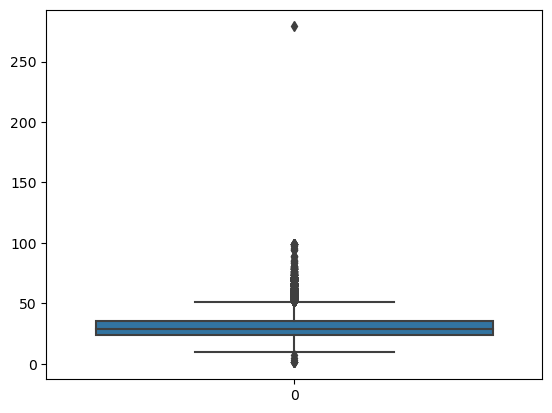

In [106]:
import seaborn as sns
sns.boxplot(data['Age'])

In [107]:
age_percentile25 = data['Age'].quantile(0.25)
age_percentile75 = data['Age'].quantile(0.75)


In [108]:
print("25th Quantile is :",age_percentile25)
print("75th Quantile is :",age_percentile75)


25th Quantile is : 24.0
75th Quantile is : 35.0


In [109]:
iqr = age_percentile75 - age_percentile25
print ("IQR: ",iqr)


IQR:  11.0


In [110]:
age_upper_limit = age_percentile75 + 1.5*iqr
age_lower_limit = age_percentile25 - 1.5*iqr
print(age_upper_limit)
print(age_lower_limit)


51.5
7.5


In [111]:
data[data['Age'] < age_lower_limit]
age_outliers= data[data['Age'] < age_lower_limit]
age_outliers


,MainBranch,Hobbyist,Age,Country,EdLevel,Ethnicity,LanguageWorkedWith,YearsCode,UndergradMajor,WorkWeekHrs,Employment,NEWLearn,LanguageDesireNextYear,Gender
8793,I am a student who is learning to code,Yes,3.0,India,NaN,NaN,HTML/CSS;Java;JavaScript;SQL,3,"Computer science, computer engineering, or sof...",NaN,Employed full-time,Every few months,NaN,Man
11600,I am a student who is learning to code,Yes,5.0,Viet Nam,Some college/university study without earning ...,South Asian,NaN,1,"Computer science, computer engineering, or sof...",NaN,Student,Once every few years,Assembly;Bash/Shell/PowerShell;C++;Go;Python,Man
12271,I am a student who is learning to code,Yes,1.0,Nigeria,"Secondary school (e.g. American high school, G...",Black or of African descent,C++;HTML/CSS;Python;SQL,Less than 1 year,NaN,NaN,Student,NaN,HTML/CSS;Python;SQL,Man
20042,I am a developer by profession,Yes,1.0,Indonesia,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,JavaScript,5,"Computer science, computer engineering, or sof...",9.0,Employed full-time,Once a year,Go,Woman;Man
25061,I am a developer by profession,Yes,1.0,Netherlands,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Bash/Shell/PowerShell;C#;C++;HTML/CSS;Java;Jav...,14,"Computer science, computer engineering, or sof...",65.0,Employed full-time,Every few months,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;K...,NaN
26952,I code primarily as a hobby,Yes,7.0,India,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,C;C#;C++;HTML/CSS;Java;JavaScript;PHP;SQL;Type...,7,"Computer science, computer engineering, or sof...",NaN,"Independent contractor, freelancer, or self-em...",Every few months,HTML/CSS;JavaScript;SQL;TypeScript,Woman;Man
54687,I am a developer by profession,Yes,1.0,United States,I never completed any formal education,Multiracial,Assembly,Less than 1 year,NaN,NaN,Employed full-time,Once a year,Assembly,Man
58292,I am a developer by profession,Yes,1.0,Indonesia,I never completed any formal education,Black or of African descent,JavaScript;PHP;SQL,3,NaN,50.0,Employed full-time,Every few months,Go;TypeScript,Man
64383,NaN,Yes,1.0,Indonesia,I never completed any formal education,"Indigenous (such as Native American, Pacific I...",Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,1,NaN,NaN,NaN,NaN,Assembly;Bash/Shell/PowerShell;C;C#;C++;Dart;G...,Woman


In [112]:
data = data[data['Age'] > age_lower_limit]


In [113]:
data = data[data['Age'] > 15]

In [114]:
data["Age"].min()

15.5

In [115]:
data["Age"].max()

279.0

/tmp/ipykernel_32/2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

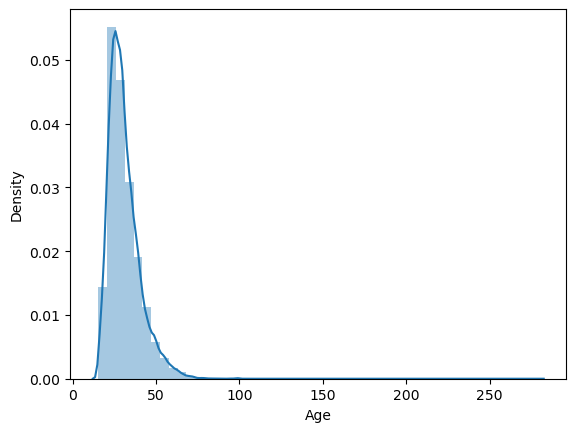

In [116]:
sns.distplot(data['Age'])

In [117]:
data = data[data['Age'] < 80]

In [118]:
data["Age"].max()

79.0

/tmp/ipykernel_32/2317092479.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Age'])


<Axes: xlabel='Age', ylabel='Density'>

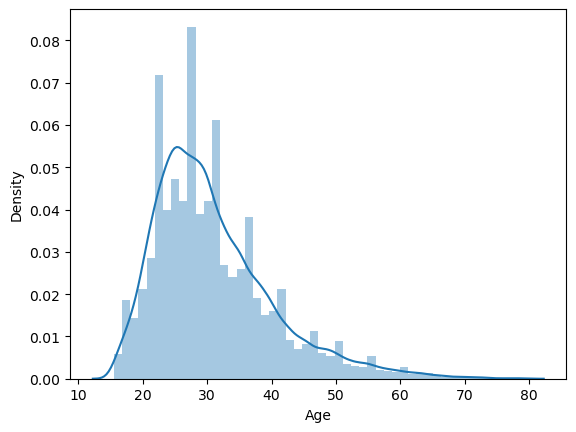

In [119]:
sns.distplot(data['Age'])

In [120]:
data.head()

,MainBranch,Hobbyist,Age,Country,EdLevel,Ethnicity,LanguageWorkedWith,YearsCode,UndergradMajor,WorkWeekHrs,Employment,NEWLearn,LanguageDesireNextYear,Gender
3,I am a developer by profession,Yes,25.0,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,NaN,7,"Computer science, computer engineering, or sof...",40.0,NaN,Once a year,NaN,Man
4,"I used to be a developer by profession, but no...",Yes,31.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,HTML/CSS;Ruby;SQL,15,"Computer science, computer engineering, or sof...",NaN,Employed full-time,Once a year,Java;Ruby;Scala,Man
7,I am a developer by profession,Yes,36.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,Python;SQL,17,"Computer science, computer engineering, or sof...",39.0,Employed full-time,Once a year,JavaScript,Man
8,I am a developer by profession,No,30.0,Tunisia,"Professional degree (JD, MD, etc.)",NaN,HTML/CSS;JavaScript;PHP,6,"Computer science, computer engineering, or sof...",50.0,"Independent contractor, freelancer, or self-em...",Once a year,Python;Rust,Man
9,I am a developer by profession,Yes,22.0,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,HTML/CSS;Java;JavaScript;Python;SQL,8,Mathematics or statistics,36.0,Employed full-time,Every few months,HTML/CSS;Java;JavaScript;Python;R;SQL,Man


In [121]:
data['Gender'].value_counts()

Man                                                            40501
Woman                                                           3308
Non-binary, genderqueer, or gender non-conforming                326
Man;Non-binary, genderqueer, or gender non-conforming            108
Woman;Non-binary, genderqueer, or gender non-conforming           83
Woman;Man                                                         45
Woman;Man;Non-binary, genderqueer, or gender non-conforming       12
Name: Gender, dtype: int64

In [122]:
data['Gender'] = data['Gender'].replace(['Non-binary, genderqueer, or gender non-conforming','Man;Non-binary, genderqueer, or gender non-conforming','Woman;Non-binary, genderqueer, or gender non-conforming','Woman;Man','Woman;Man;Non-binary, genderqueer, or gender non-conforming'],'Gender_Unrevealed')

In [124]:
data['Gender'].value_counts()

Man                  40501
Woman                 3308
Gender_Unrevealed      574
Name: Gender, dtype: int64

In [125]:
data.head()

,MainBranch,Hobbyist,Age,Country,EdLevel,Ethnicity,LanguageWorkedWith,YearsCode,UndergradMajor,WorkWeekHrs,Employment,NEWLearn,LanguageDesireNextYear,Gender
3,I am a developer by profession,Yes,25.0,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,NaN,7,"Computer science, computer engineering, or sof...",40.0,NaN,Once a year,NaN,Man
4,"I used to be a developer by profession, but no...",Yes,31.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,HTML/CSS;Ruby;SQL,15,"Computer science, computer engineering, or sof...",NaN,Employed full-time,Once a year,Java;Ruby;Scala,Man
7,I am a developer by profession,Yes,36.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,Python;SQL,17,"Computer science, computer engineering, or sof...",39.0,Employed full-time,Once a year,JavaScript,Man
8,I am a developer by profession,No,30.0,Tunisia,"Professional degree (JD, MD, etc.)",NaN,HTML/CSS;JavaScript;PHP,6,"Computer science, computer engineering, or sof...",50.0,"Independent contractor, freelancer, or self-em...",Once a year,Python;Rust,Man
9,I am a developer by profession,Yes,22.0,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,HTML/CSS;Java;JavaScript;Python;SQL,8,Mathematics or statistics,36.0,Employed full-time,Every few months,HTML/CSS;Java;JavaScript;Python;R;SQL,Man


Get top 17 most occured countries whose value counts is above 500

In [138]:
data['Country'].value_counts()[:17].sort_values(ascending = False)

United States         9494
India                 4370
Germany               3061
United Kingdom        2992
Canada                1638
France                1464
Brazil                1373
Netherlands           1071
Poland                1000
Australia              932
Spain                  893
Italy                  850
Russian Federation     802
Sweden                 695
Turkey                 501
Switzerland            500
Pakistan               470
Name: Country, dtype: int64

<Axes: >

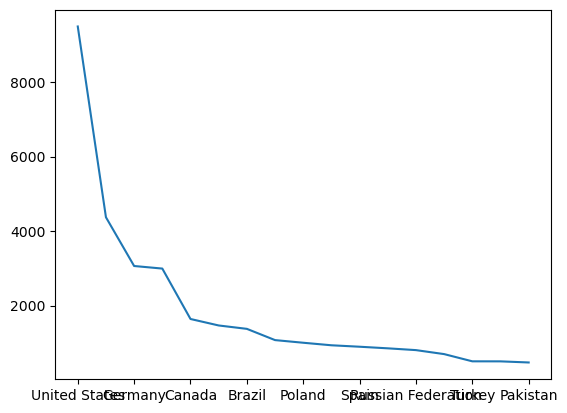

In [137]:
data['Country'].value_counts()[:17].sort_values(ascending = False).plot()

In [139]:
data.head()

,MainBranch,Hobbyist,Age,Country,EdLevel,Ethnicity,LanguageWorkedWith,YearsCode,UndergradMajor,WorkWeekHrs,Employment,NEWLearn,LanguageDesireNextYear,Gender
3,I am a developer by profession,Yes,25.0,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,NaN,7,"Computer science, computer engineering, or sof...",40.0,NaN,Once a year,NaN,Man
4,"I used to be a developer by profession, but no...",Yes,31.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,HTML/CSS;Ruby;SQL,15,"Computer science, computer engineering, or sof...",NaN,Employed full-time,Once a year,Java;Ruby;Scala,Man
7,I am a developer by profession,Yes,36.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,Python;SQL,17,"Computer science, computer engineering, or sof...",39.0,Employed full-time,Once a year,JavaScript,Man
8,I am a developer by profession,No,30.0,Tunisia,"Professional degree (JD, MD, etc.)",NaN,HTML/CSS;JavaScript;PHP,6,"Computer science, computer engineering, or sof...",50.0,"Independent contractor, freelancer, or self-em...",Once a year,Python;Rust,Man
9,I am a developer by profession,Yes,22.0,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,HTML/CSS;Java;JavaScript;Python;SQL,8,Mathematics or statistics,36.0,Employed full-time,Every few months,HTML/CSS;Java;JavaScript;Python;R;SQL,Man


In [140]:
data['MainBranch'].value_counts()

I am a developer by profession                                                   34308
I am a student who is learning to code                                            4798
I am not primarily a developer, but I write code sometimes as part of my work     3790
I code primarily as a hobby                                                       1240
I used to be a developer by profession, but no longer am                           748
Name: MainBranch, dtype: int64

In [141]:
data['MainBranch'] = data['MainBranch'].replace(['I am a developer by profession'],'Developer')
data['MainBranch'] = data['MainBranch'].replace(['I am a student who is learning to code'],'Student')
data['MainBranch'] = data['MainBranch'].replace(['I am not primarily a developer, but I write code sometimes as part of my work'],'Not a Developer')
data['MainBranch'] = data['MainBranch'].replace(['I code primarily as a hobby'],'Hobby')
data['MainBranch'] = data['MainBranch'].replace(['I used to be a developer by profession, but no longer am'],'Past Developer')

In [142]:
data.head()

,MainBranch,Hobbyist,Age,Country,EdLevel,Ethnicity,LanguageWorkedWith,YearsCode,UndergradMajor,WorkWeekHrs,Employment,NEWLearn,LanguageDesireNextYear,Gender
3,Developer,Yes,25.0,Albania,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,NaN,7,"Computer science, computer engineering, or sof...",40.0,NaN,Once a year,NaN,Man
4,Past Developer,Yes,31.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,HTML/CSS;Ruby;SQL,15,"Computer science, computer engineering, or sof...",NaN,Employed full-time,Once a year,Java;Ruby;Scala,Man
7,Developer,Yes,36.0,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",White or of European descent,Python;SQL,17,"Computer science, computer engineering, or sof...",39.0,Employed full-time,Once a year,JavaScript,Man
8,Developer,No,30.0,Tunisia,"Professional degree (JD, MD, etc.)",NaN,HTML/CSS;JavaScript;PHP,6,"Computer science, computer engineering, or sof...",50.0,"Independent contractor, freelancer, or self-em...",Once a year,Python;Rust,Man
9,Developer,Yes,22.0,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",White or of European descent,HTML/CSS;Java;JavaScript;Python;SQL,8,Mathematics or statistics,36.0,Employed full-time,Every few months,HTML/CSS;Java;JavaScript;Python;R;SQL,Man


In [143]:
data['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          20441
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       10129
Some college/university study without earning a degree                                 5773
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     3588
Associate degree (A.A., A.S., etc.)                                                    1477
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1313
Professional degree (JD, MD, etc.)                                                      597
Primary/elementary school                                                               490
I never completed any formal education                                                  230
Name: EdLevel, dtype: int64

In [145]:
data['EdLevel'] = data['EdLevel'].replace(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)'],'Bachelor')
data['EdLevel'] = data['EdLevel'].replace(['Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'],'Master')
data['EdLevel'] = data['EdLevel'].replace(['Some college/university study without earning a degree'],'Under Graduate')
data['EdLevel'] = data['EdLevel'].replace(['Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'],'Secondary school')
data['EdLevel'] = data['EdLevel'].replace(['Associate degree (A.A., A.S., etc.)'],'Associate Degree')
data['EdLevel'] = data['EdLevel'].replace(['Other doctoral degree (Ph.D., Ed.D., etc.)'],'Doctorate')
data['EdLevel'] = data['EdLevel'].replace(['Professional degree (JD, MD, etc.)'],'Professional')
data['EdLevel'] = data['EdLevel'].replace(['Primary/elementary school'],'Primary School')
data['EdLevel'] = data['EdLevel'].replace(['I never completed any formal education'],'No specific Education')


In [146]:
data.head()

,MainBranch,Hobbyist,Age,Country,EdLevel,Ethnicity,LanguageWorkedWith,YearsCode,UndergradMajor,WorkWeekHrs,Employment,NEWLearn,LanguageDesireNextYear,Gender
3,Developer,Yes,25.0,Albania,Master,White or of European descent,NaN,7,"Computer science, computer engineering, or sof...",40.0,NaN,Once a year,NaN,Man
4,Past Developer,Yes,31.0,United States,Bachelor,White or of European descent,HTML/CSS;Ruby;SQL,15,"Computer science, computer engineering, or sof...",NaN,Employed full-time,Once a year,Java;Ruby;Scala,Man
7,Developer,Yes,36.0,United States,Bachelor,White or of European descent,Python;SQL,17,"Computer science, computer engineering, or sof...",39.0,Employed full-time,Once a year,JavaScript,Man
8,Developer,No,30.0,Tunisia,Professional,NaN,HTML/CSS;JavaScript;PHP,6,"Computer science, computer engineering, or sof...",50.0,"Independent contractor, freelancer, or self-em...",Once a year,Python;Rust,Man
9,Developer,Yes,22.0,United Kingdom,Master,White or of European descent,HTML/CSS;Java;JavaScript;Python;SQL,8,Mathematics or statistics,36.0,Employed full-time,Every few months,HTML/CSS;Java;JavaScript;Python;R;SQL,Man


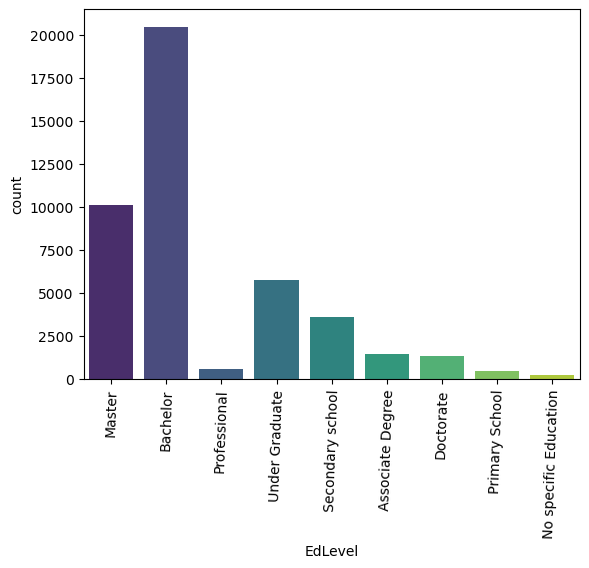

In [161]:
import matplotlib.pyplot as plt
sns.countplot(x= 'EdLevel',data=data, palette = 'viridis')
plt.xticks(rotation=88);

In [148]:
data = data.drop(['Ethnicity'], axis = 1)

In [149]:
data.head()

,MainBranch,Hobbyist,Age,Country,EdLevel,LanguageWorkedWith,YearsCode,UndergradMajor,WorkWeekHrs,Employment,NEWLearn,LanguageDesireNextYear,Gender
3,Developer,Yes,25.0,Albania,Master,NaN,7,"Computer science, computer engineering, or sof...",40.0,NaN,Once a year,NaN,Man
4,Past Developer,Yes,31.0,United States,Bachelor,HTML/CSS;Ruby;SQL,15,"Computer science, computer engineering, or sof...",NaN,Employed full-time,Once a year,Java;Ruby;Scala,Man
7,Developer,Yes,36.0,United States,Bachelor,Python;SQL,17,"Computer science, computer engineering, or sof...",39.0,Employed full-time,Once a year,JavaScript,Man
8,Developer,No,30.0,Tunisia,Professional,HTML/CSS;JavaScript;PHP,6,"Computer science, computer engineering, or sof...",50.0,"Independent contractor, freelancer, or self-em...",Once a year,Python;Rust,Man
9,Developer,Yes,22.0,United Kingdom,Master,HTML/CSS;Java;JavaScript;Python;SQL,8,Mathematics or statistics,36.0,Employed full-time,Every few months,HTML/CSS;Java;JavaScript;Python;R;SQL,Man


In [162]:
data['YearsCode'].value_counts()

10                    3576
5                     3137
6                     2874
8                     2696
7                     2644
4                     2286
15                    2121
20                    2053
3                     2023
12                    1971
9                     1885
11                    1391
2                     1293
13                    1215
14                    1202
25                    1068
16                    1009
18                     898
30                     873
17                     872
22                     660
1                      567
19                     551
23                     500
35                     479
21                     461
Less than 1 year       438
40                     416
24                     378
26                     329
27                     281
28                     269
32                     265
38                     231
37                     219
36                     203
34                     199
3

In [163]:
data['YearsCode'] = data['YearsCode'].replace(['Less than 1 year'],'1')
data['YearsCode'] = data['YearsCode'].replace(['More than 50 years'],'50')

In [165]:
data['YearsCode'].value_counts()

10    3576
5     3137
6     2874
8     2696
7     2644
4     2286
15    2121
20    2053
3     2023
12    1971
9     1885
11    1391
2     1293
13    1215
14    1202
25    1068
16    1009
1     1005
18     898
30     873
17     872
22     660
19     551
23     500
35     479
21     461
40     416
24     378
26     329
27     281
28     269
32     265
38     231
37     219
36     203
34     199
33     197
29     150
31     128
39     127
50     117
42     103
41      86
45      82
43      81
44      51
46      36
48      29
47      20
49      17
Name: YearsCode, dtype: int64

In [166]:
data.head()

,MainBranch,Hobbyist,Age,Country,EdLevel,LanguageWorkedWith,YearsCode,UndergradMajor,WorkWeekHrs,Employment,NEWLearn,LanguageDesireNextYear,Gender
3,Developer,Yes,25.0,Albania,Master,NaN,7,"Computer science, computer engineering, or sof...",40.0,NaN,Once a year,NaN,Man
4,Past Developer,Yes,31.0,United States,Bachelor,HTML/CSS;Ruby;SQL,15,"Computer science, computer engineering, or sof...",NaN,Employed full-time,Once a year,Java;Ruby;Scala,Man
7,Developer,Yes,36.0,United States,Bachelor,Python;SQL,17,"Computer science, computer engineering, or sof...",39.0,Employed full-time,Once a year,JavaScript,Man
8,Developer,No,30.0,Tunisia,Professional,HTML/CSS;JavaScript;PHP,6,"Computer science, computer engineering, or sof...",50.0,"Independent contractor, freelancer, or self-em...",Once a year,Python;Rust,Man
9,Developer,Yes,22.0,United Kingdom,Master,HTML/CSS;Java;JavaScript;Python;SQL,8,Mathematics or statistics,36.0,Employed full-time,Every few months,HTML/CSS;Java;JavaScript;Python;R;SQL,Man


In [167]:
data['UndergradMajor'].value_counts()

Computer science, computer engineering, or software engineering                   24577
Another engineering discipline (such as civil, electrical, mechanical, etc.)       3642
Information systems, information technology, or system administration              3096
A natural science (such as biology, chemistry, physics, etc.)                      1814
Mathematics or statistics                                                          1468
Web development or web design                                                      1233
A business discipline (such as accounting, finance, marketing, etc.)               1059
A humanities discipline (such as literature, history, philosophy, etc.)             829
A social science (such as anthropology, psychology, political science, etc.)        758
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      593
I never declared a major                                                            342
A health science (such as nursin

In [168]:
data['UndergradMajor'] = data['UndergradMajor'].replace(['Computer science, computer engineering, or software engineering'],'Computer Engineering')
data['UndergradMajor'] = data['UndergradMajor'].replace(['Another engineering discipline (such as civil, electrical, mechanical, etc.)'],'Other Engineering')
data['UndergradMajor'] = data['UndergradMajor'].replace(['Information systems, information technology, or system administration'],'Computer Science')
data['UndergradMajor'] = data['UndergradMajor'].replace(['A natural science (such as biology, chemistry, physics, etc.)'],'Science')
data['UndergradMajor'] = data['UndergradMajor'].replace(['Mathematics or statistics'],'Mathematics or statistics')
data['UndergradMajor'] = data['UndergradMajor'].replace(['Web development or web design'],'Frontend course')
data['UndergradMajor'] = data['UndergradMajor'].replace(['A business discipline (such as accounting, finance, marketing, etc.)'],'Business')
data['UndergradMajor'] = data['UndergradMajor'].replace(['A humanities discipline (such as literature, history, philosophy, etc.)'],'Humanities')
data['UndergradMajor'] = data['UndergradMajor'].replace(['A social science (such as anthropology, psychology, political science, etc.)'],'Social Science')
data['UndergradMajor'] = data['UndergradMajor'].replace(['Fine arts or performing arts (such as graphic design, music, studio art, etc.)'],'Arts')
data['UndergradMajor'] = data['UndergradMajor'].replace(['I never declared a major'],'No Major')
data['UndergradMajor'] = data['UndergradMajor'].replace(['A health science (such as nursing, pharmacy, radiology, etc.)'],'Health Science')



In [169]:
data.head()

,MainBranch,Hobbyist,Age,Country,EdLevel,LanguageWorkedWith,YearsCode,UndergradMajor,WorkWeekHrs,Employment,NEWLearn,LanguageDesireNextYear,Gender
3,Developer,Yes,25.0,Albania,Master,NaN,7,Computer Engineering,40.0,NaN,Once a year,NaN,Man
4,Past Developer,Yes,31.0,United States,Bachelor,HTML/CSS;Ruby;SQL,15,Computer Engineering,NaN,Employed full-time,Once a year,Java;Ruby;Scala,Man
7,Developer,Yes,36.0,United States,Bachelor,Python;SQL,17,Computer Engineering,39.0,Employed full-time,Once a year,JavaScript,Man
8,Developer,No,30.0,Tunisia,Professional,HTML/CSS;JavaScript;PHP,6,Computer Engineering,50.0,"Independent contractor, freelancer, or self-em...",Once a year,Python;Rust,Man
9,Developer,Yes,22.0,United Kingdom,Master,HTML/CSS;Java;JavaScript;Python;SQL,8,Mathematics or statistics,36.0,Employed full-time,Every few months,HTML/CSS;Java;JavaScript;Python;R;SQL,Man


In [171]:
data['WorkWeekHrs'].min()

1.0

In [172]:
data['WorkWeekHrs'].max()

475.0

A week has 168 hours if we calculate as 24 x 7, but max val we are getting as 475. A human on an average sleeps for 5 hours and so -35, 2 hours rest of the activities -14 means 168-49 hours = 119 hours

In [175]:
data = data[data['WorkWeekHrs'] < 119]

In [177]:
data['WorkWeekHrs'].max()

115.0

In [178]:
data.head()

,MainBranch,Hobbyist,Age,Country,EdLevel,LanguageWorkedWith,YearsCode,UndergradMajor,WorkWeekHrs,Employment,NEWLearn,LanguageDesireNextYear,Gender
3,Developer,Yes,25.0,Albania,Master,NaN,7,Computer Engineering,40.0,NaN,Once a year,NaN,Man
7,Developer,Yes,36.0,United States,Bachelor,Python;SQL,17,Computer Engineering,39.0,Employed full-time,Once a year,JavaScript,Man
8,Developer,No,30.0,Tunisia,Professional,HTML/CSS;JavaScript;PHP,6,Computer Engineering,50.0,"Independent contractor, freelancer, or self-em...",Once a year,Python;Rust,Man
9,Developer,Yes,22.0,United Kingdom,Master,HTML/CSS;Java;JavaScript;Python;SQL,8,Mathematics or statistics,36.0,Employed full-time,Every few months,HTML/CSS;Java;JavaScript;Python;R;SQL,Man
10,Developer,Yes,23.0,United Kingdom,Bachelor,C#;JavaScript;Swift,10,Computer Engineering,40.0,Employed full-time,Every few months,Go;JavaScript;Swift;TypeScript,Man


In [179]:
data['Employment'].value_counts()

Employed full-time                                      30506
Independent contractor, freelancer, or self-employed     3334
Employed part-time                                       1109
Name: Employment, dtype: int64

In [180]:
data['Employment'] = data['Employment'].replace(['Employed full-time'],'Full Time')
data['Employment'] = data['Employment'].replace(['Independent contractor, freelancer, or self-employed'],'Freelancer')
data['Employment'] = data['Employment'].replace(['Employed part-time'],'Part Time')

In [182]:
data.head()

,MainBranch,Hobbyist,Age,Country,EdLevel,LanguageWorkedWith,YearsCode,UndergradMajor,WorkWeekHrs,Employment,NEWLearn,LanguageDesireNextYear,Gender
3,Developer,Yes,25.0,Albania,Master,NaN,7,Computer Engineering,40.0,NaN,Once a year,NaN,Man
7,Developer,Yes,36.0,United States,Bachelor,Python;SQL,17,Computer Engineering,39.0,Full Time,Once a year,JavaScript,Man
8,Developer,No,30.0,Tunisia,Professional,HTML/CSS;JavaScript;PHP,6,Computer Engineering,50.0,Freelancer,Once a year,Python;Rust,Man
9,Developer,Yes,22.0,United Kingdom,Master,HTML/CSS;Java;JavaScript;Python;SQL,8,Mathematics or statistics,36.0,Full Time,Every few months,HTML/CSS;Java;JavaScript;Python;R;SQL,Man
10,Developer,Yes,23.0,United Kingdom,Bachelor,C#;JavaScript;Swift,10,Computer Engineering,40.0,Full Time,Every few months,Go;JavaScript;Swift;TypeScript,Man


In [183]:
data['NEWLearn'].value_counts()

Once a year             13163
Every few months        11141
Once every few years     8988
Once a decade             710
Name: NEWLearn, dtype: int64

In [184]:
data = data.rename(columns = {"NEWLearn":"New_Tech_Learn"})

In [185]:
data.head()

,MainBranch,Hobbyist,Age,Country,EdLevel,LanguageWorkedWith,YearsCode,UndergradMajor,WorkWeekHrs,Employment,New_Tech_Learn,LanguageDesireNextYear,Gender
3,Developer,Yes,25.0,Albania,Master,NaN,7,Computer Engineering,40.0,NaN,Once a year,NaN,Man
7,Developer,Yes,36.0,United States,Bachelor,Python;SQL,17,Computer Engineering,39.0,Full Time,Once a year,JavaScript,Man
8,Developer,No,30.0,Tunisia,Professional,HTML/CSS;JavaScript;PHP,6,Computer Engineering,50.0,Freelancer,Once a year,Python;Rust,Man
9,Developer,Yes,22.0,United Kingdom,Master,HTML/CSS;Java;JavaScript;Python;SQL,8,Mathematics or statistics,36.0,Full Time,Every few months,HTML/CSS;Java;JavaScript;Python;R;SQL,Man
10,Developer,Yes,23.0,United Kingdom,Bachelor,C#;JavaScript;Swift,10,Computer Engineering,40.0,Full Time,Every few months,Go;JavaScript;Swift;TypeScript,Man


In [187]:
data['New_Tech_Learn'].value_counts()

Once a year             13163
Every few months        11141
Once every few years     8988
Once a decade             710
Name: New_Tech_Learn, dtype: int64

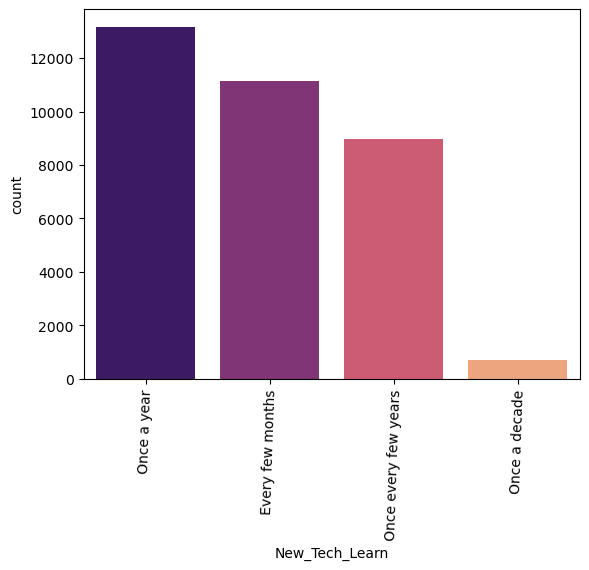

In [190]:
sns.countplot(x = 'New_Tech_Learn', data = data, palette = 'magma')
plt.xticks(rotation=88);

In [191]:
data.head()

,MainBranch,Hobbyist,Age,Country,EdLevel,LanguageWorkedWith,YearsCode,UndergradMajor,WorkWeekHrs,Employment,New_Tech_Learn,LanguageDesireNextYear,Gender
3,Developer,Yes,25.0,Albania,Master,NaN,7,Computer Engineering,40.0,NaN,Once a year,NaN,Man
7,Developer,Yes,36.0,United States,Bachelor,Python;SQL,17,Computer Engineering,39.0,Full Time,Once a year,JavaScript,Man
8,Developer,No,30.0,Tunisia,Professional,HTML/CSS;JavaScript;PHP,6,Computer Engineering,50.0,Freelancer,Once a year,Python;Rust,Man
9,Developer,Yes,22.0,United Kingdom,Master,HTML/CSS;Java;JavaScript;Python;SQL,8,Mathematics or statistics,36.0,Full Time,Every few months,HTML/CSS;Java;JavaScript;Python;R;SQL,Man
10,Developer,Yes,23.0,United Kingdom,Bachelor,C#;JavaScript;Swift,10,Computer Engineering,40.0,Full Time,Every few months,Go;JavaScript;Swift;TypeScript,Man


In [193]:
data.isnull().sum()

MainBranch                   0
Hobbyist                     0
Age                          0
Country                      0
EdLevel                    571
LanguageWorkedWith         198
YearsCode                  101
UndergradMajor            2566
WorkWeekHrs                  0
Employment                  54
New_Tech_Learn            1001
LanguageDesireNextYear    1825
Gender                     395
dtype: int64

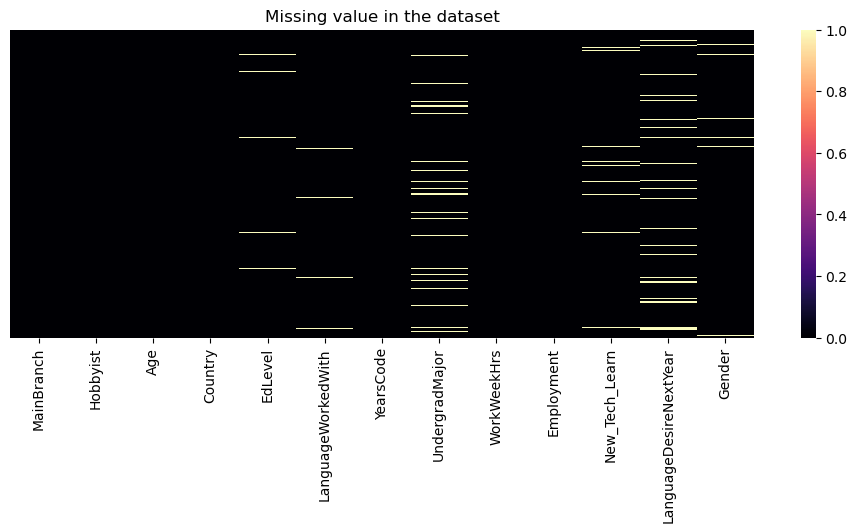

In [201]:
plt.figure(figsize=(12,4))
sns.heatmap(data.isnull(),cbar=True,cmap='magma',yticklabels=False)
plt.title('Missing value in the dataset');